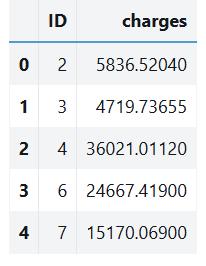

In [ ]:
import pandas as pd
#데이터 로드
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_test.csv")


display(X_train.head())
display(X_test.head())
display(y_train.head())

,ID,age,sex,bmi,children,smoker,region
0,2,35,female,35.860,2,no,southeast
1,3,28,female,23.845,2,no,northwest
2,4,23,female,32.780,2,yes,southeast
3,6,52,female,25.300,2,yes,southeast
4,7,63,male,39.800,3,no,southwest


,ID,age,sex,bmi,children,smoker,region
0,0,34,male,42.900,1,no,southwest
1,1,18,female,28.215,0,no,northeast
2,5,43,female,29.900,1,no,southwest
3,21,28,male,33.820,0,no,northwest
4,26,56,female,41.910,0,no,southeast


,ID,charges
0,2,5836.52040
1,3,4719.73655
2,4,36021.01120
3,6,24667.41900
4,7,15170.06900


In [ ]:
X_train.describe()

,age,sex,bmi,children,smoker,region
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.146729,0.505607,30.743131,1.086916,0.196262,1.532710
std,14.247707,0.500202,6.101926,1.192005,0.397354,1.100368
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,26.410000,0.000000,0.000000,1.000000
50%,39.000000,1.000000,30.495000,1.000000,0.000000,2.000000
75%,52.000000,1.000000,34.770000,2.000000,0.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


In [ ]:
 X_train.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
import pandas as pd
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_test.csv")

X_train = X_train.drop('ID', axis=1)
target = y_train['charges']
X_test_id = X_test.pop('ID')

#수가작아서 스캘링 불필요 but 성능을 높이기 위해 BMI지수 인코딩 해주기 &bmi50은 의료적으로 매우 극단적인 값임(도메인지식)
# for 문 뺴기 ->스켈링은 for 문 불필요
from sklearn.preprocessing import RobustScaler
cols = 'bmi'
scaler= RobustScaler()
X_train[[cols]] = scaler.fit_transform(X_train[[cols]])
X_test[[cols]] = scaler.transform(X_test[[cols]])

#


# object_cols = ['sex', 'smoker', 'region']
# for col in object_cols:
#   print(X_train[col].unique())
#   print(X_test[col].unique())

# print(X_train[object_cols].nunique())
# print(X_test[object_cols].nunique())

#인코딩
from sklearn.preprocessing import LabelEncoder
cols = ['sex', 'smoker', 'region']
for col in cols:
  le = LabelEncoder()
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.transform(X_test[col])

# X_train.select_dtypes(include='object')


#데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train,
                                            target,
                                            test_size=0.2,
                                            random_state=2025)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

#학습진행
#중요! 하이퍼파라미터에서 class_weight는 분류문제에서만 가능함!!!
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 5, min_samples_leaf=7, n_estimators=1000)
model.fit(X_tr,y_tr)
pred = model.predict(X_val)
pred

#성능평가 및 검증
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(y_val,pred)
mae = mean_absolute_error(y_val,pred)
rmse= root_mean_squared_error(y_val,pred)
mape= mean_absolute_percentage_error(y_val,pred)
r2_score = r2_score(y_val,pred)

print(f"mse : {mse}")
print(f"mae : {mae}")
print(f"rmse : {rmse}")
print(f"mape : {mape}")
print(f"r2_score:{r2_score}")


#일반
mae : 2555.608295611973
rmse : 4611.938256010402
mape : 0.3234231430116495
r2_score:0.8671600603830829


# max_depth = 5
mse : 18230630.109526172
mae : 2479.07995410299
rmse : 4269.734196589546
mape : 0.3147670665970523
r2_score:0.8861420447157651


#min_samples_leaf=7
mse : 17012115.175774053
mae : 2410.690663573686
rmse : 4124.574544819629
mape : 0.31444593478446253
r2_score:0.8937521831479976

#n_estimators=1000
mse : 16991318.090195682
mae : 2413.1527126044043
rmse : 4122.052654951861
mape : 0.31175228913619646
r2_score:0.8938820696974804

#스켈링 추가로 해주기
mse : 16976673.243784964
mae : 2391.0966560299134
rmse : 4120.275869864173
mape : 0.30959790362789463
r2_score:0.8939735329249037



#test데이터 적용 및 제출
pred_result = model.predict(X_test)

# #만약 정수형을 제출했어야한다면
# pred_result_int = pred_result.round().astype(int)

result = pd.DataFrame({
                    'ID' : X_test_id,
                    'charges' : pred_result
})

result.to_csv("1234123.csv", index=False)

['female' 'male']
['male' 'female']
['no' 'yes']
['no' 'yes']
['southeast' 'northwest' 'southwest' 'northeast']
['southwest' 'northeast' 'northwest' 'southeast']
sex       2
smoker    2
region    4
dtype: int64
sex       2
smoker    2
region    4
dtype: int64
mse : 16995523.325668626
mae : 2401.4653509636373
rmse : 4122.562713370001
mape : 0.3111241566263156
r2_score:0.8938558062326654


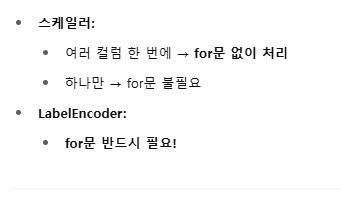